In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

## Load rental estate purchases data

In [7]:
data_path = "/.data.csv"

In [8]:
data_df = pd.read_csv(data_path)
data_df

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005.0,11.0,Apartment,30,743,246173,Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756,246332,Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587,209281,Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1605,452667,Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375,467083,Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1239,322611,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaN,NaN,Apartment,47,795,279191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaN,NaN,Apartment,48,1013,287997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaN,NaN,Apartment,50,1075,365869,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
display(data_df.columns.to_list())

['ID',
 'Building',
 'Year of sale',
 'Month of sale',
 'Type of property',
 'Property #',
 'Area (ft.)',
 'Price',
 'Status',
 'Customer ID',
 'Entity',
 'Name',
 'Surname',
 'Age at time of purchase',
 'Interval',
 'Y',
 'M',
 'D',
 'Gender',
 'Country',
 'State',
 'Purpose',
 'Deal satisfaction',
 'Mortgage',
 'Source']

## Price exploration

In [257]:
price_df = data_df[['Price']].dropna()

display(price_df.describe())

print("Median:", price_df['Price'].median())
print("Mode:", price_df['Price'].mode())
print("Variance:", price_df['Price'].var())
print("Skweness:", price_df['Price'].skew().round(3))


,Price
count,267.000000
mean,281171.910112
std,89119.087150
min,117564.000000
25%,217553.000000
50%,249076.000000
75%,326964.500000
max,538272.000000


Median: 249076.0
Mode: 0    460001
dtype: int64
Variance: 7942211694.397905
Skweness: 1.096


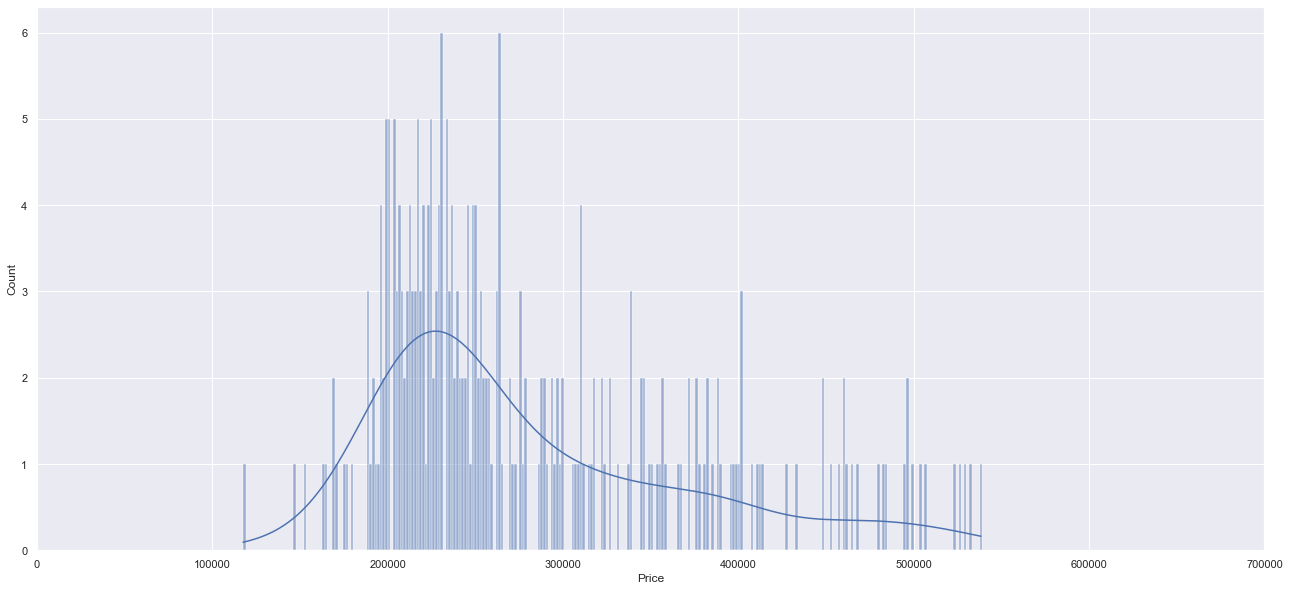

In [152]:
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.histplot(x=price_df['Price'], binwidth=1500, kde = True, ax=ax)
ax.set(xlim=(0,700000))
plt.show()

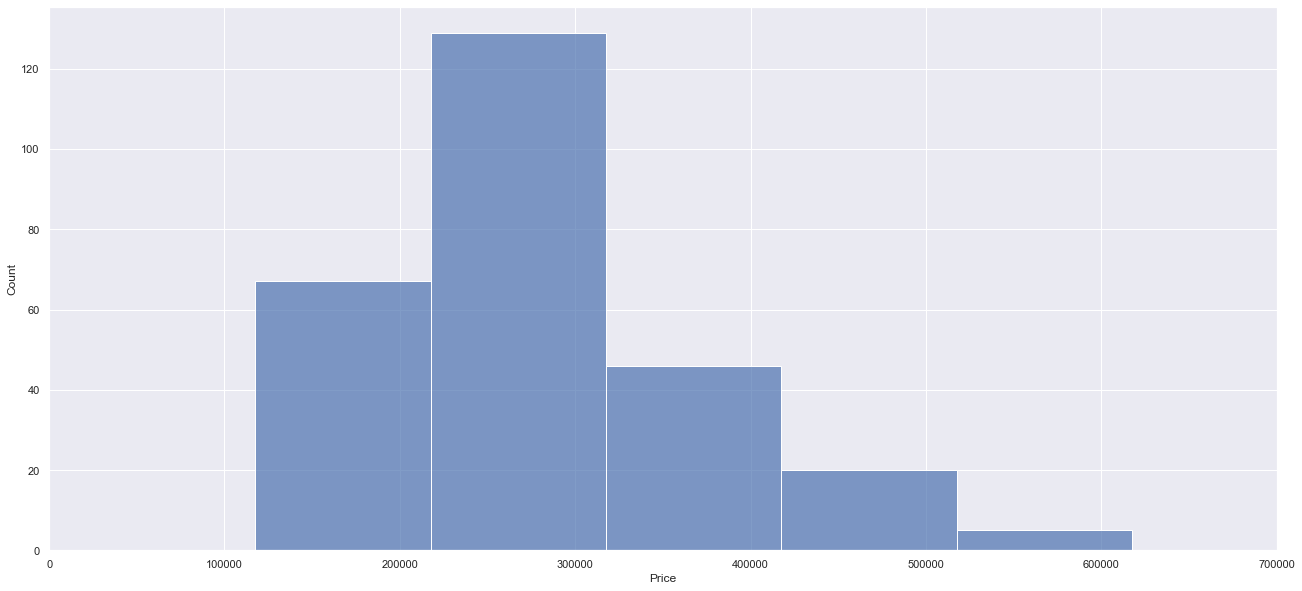

In [153]:
sns.set()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.histplot(data=price_df, x=price_df['Price'], binwidth=100000, alpha = .7, ax=ax)
ax.set(xlim=(0,700000))
plt.show()

## Area exploration

In [156]:
area_df = data_df[['Area (ft.)']].dropna()
area_df.describe()

,Area (ft.)
count,267.000000
mean,936.172285
std,284.916741
min,411.000000
25%,756.000000
50%,798.000000
75%,1122.000000
max,1943.000000


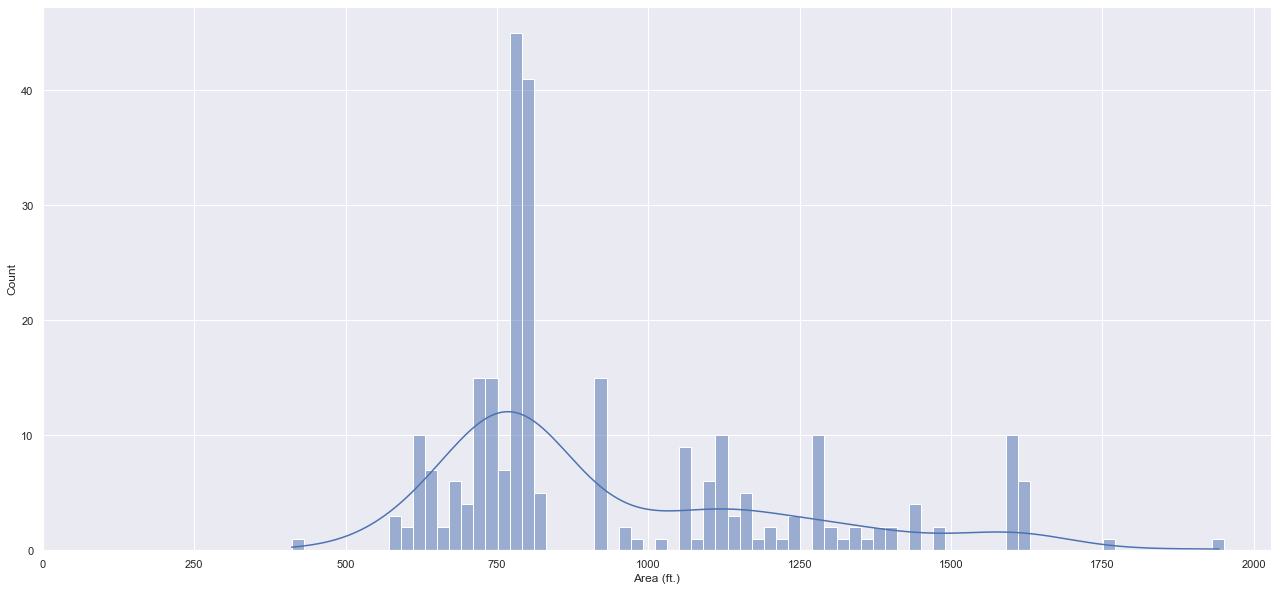

In [163]:
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.histplot(x=area_df['Area (ft.)'], binwidth=20, kde = True, ax=ax)
ax.set(xlim=(0))
plt.show()

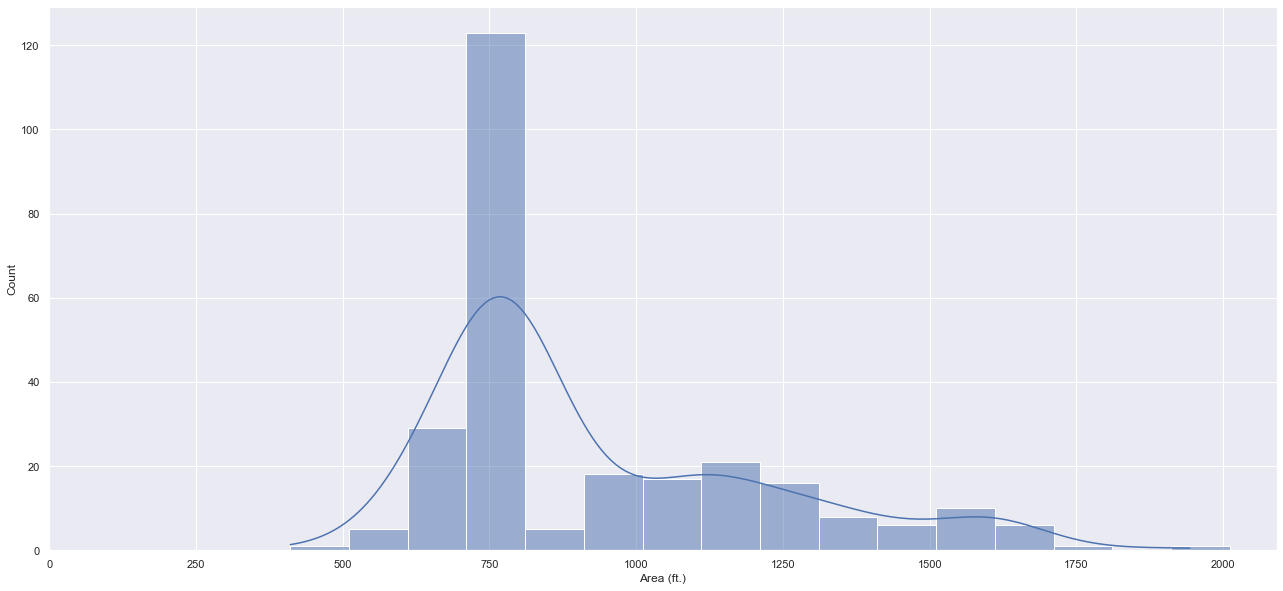

In [164]:
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.histplot(x=area_df['Area (ft.)'], binwidth=100, kde = True, ax=ax)
ax.set(xlim=(0))
plt.show()

## Price vs Area exploration

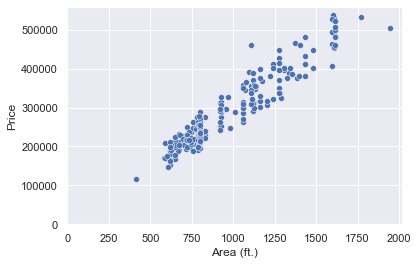

In [167]:
price_area_df = data_df[['Price', 'Area (ft.)']].dropna()

ax = sns.scatterplot(data=price_area_df, x=price_area_df['Area (ft.)'], y=price_area_df['Price'])
ax.set(xlim=(0), ylim=(0))

plt.show()

In [168]:
price_area_df.corr()

,Price,Area (ft.)
Price,1.0000,0.9511
Area (ft.),0.9511,1.0000


## Explore country buyers

In [206]:
country_df = data_df[['Country']].dropna()
country_df.describe()

,Country
count,195
unique,9
top,USA
freq,165


In [207]:
country_df['Country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada'], dtype=object)

In [208]:
country_df['Country'] = country_df['Country'].apply(lambda x: str(x).strip())

In [209]:
# Frequency table
country_df = country_df \
        .groupby(by='Country') \
        .size().to_frame('frequency') \
        .sort_values(by='frequency', ascending=False)

country_df

,frequency
Country,
USA,177
Canada,7
Russia,4
Belgium,2
UK,2
Denmark,1
Germany,1
Mexico,1


In [221]:
# Cumulative percentage
country_df['cum_percentage'] = round(country_df['frequency'].cumsum() / country_df['frequency'].sum() * 100, 2)
country_df

,frequency,cum_percentage
Country,,
USA,177,90.77
Canada,7,94.36
Russia,4,96.41
Belgium,2,97.44
UK,2,98.46
Denmark,1,98.97
Germany,1,99.49
Mexico,1,100.00


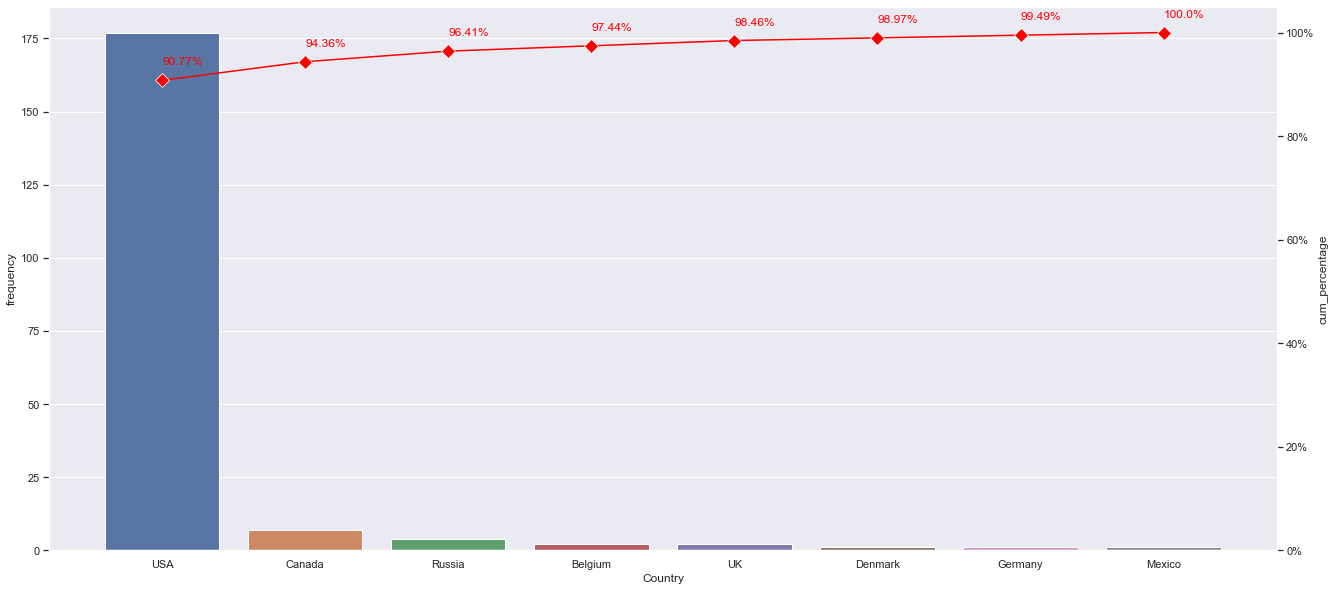

In [245]:
# Plot Pareto chart
fig, ax = plt.subplots(figsize=(22, 10))

ax1 = sns.barplot(data=country_df, x=country_df.index, y=country_df['frequency'], ax=ax)

ax1 = ax1.twinx()

ax2 = sns.lineplot(data=country_df, x=country_df.index, y=country_df['cum_percentage'], ax=ax1, color='red', marker='D', ms=10)
for x, y in enumerate(country_df['cum_percentage']):
    plt.text(x, y + 3, str(y) + '%', color='red')

ax2.set(ylim=(0, 105))
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.grid(False)


plt.show()

In [258]:
price_area_df.cov()

,Price,Area (ft.)
Price,7.942212e+09,2.414988e+07
Area (ft.),2.414988e+07,8.117755e+04


In [259]:
price_area_df.corr()

,Price,Area (ft.)
Price,1.0000,0.9511
Area (ft.),0.9511,1.0000
